# GMU ECE 527 - Computer Exercise #7 - Code
**Stewart Schuler - G01395779**\
**20241107**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

np.random.seed(1)

from os import mkdir
try:
    mkdir('figures/')
except OSError as error:
    pass 

In [2]:
# Plot the decision function for a classifier clf
#
def plot_classifier(clf,X,y):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal', adjustable='box')
    data = pd.DataFrame(X,columns=["x1","x2"])
    sns.scatterplot(data=data, x="x1", y="x2",  hue=y, palette=['red','blue'])
# create grid to evaluate model
    xx = np.linspace(-2, 2, 100)
    yy = np.linspace(-2, 2, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict_proba(xy)
    Z = Z[:,1].reshape(XX.shape)#.reshape(XX.shape)
# plot decision boundary and margins
    levels = np.arange(0, 0.1, 0.1)
    plt.contour(XX, YY, Z, colors='blue',levels=[0.5], alpha=0.5,linestyles=['--', '-', '--'])

In [3]:
# Make a 3-d plot of the decision surface for classifier clf
#  Range of values for x and y are [-2, 2]
def plot_classifier_3d(clf):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
    xx = np.linspace(-2, 2, 100)
    yy = np.linspace(-2, 2, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict_proba(xy)
    Z = Z[:,1].reshape(XX.shape)#.reshape(XX.shape)
    surf = ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
    ax.set_zlim(0, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

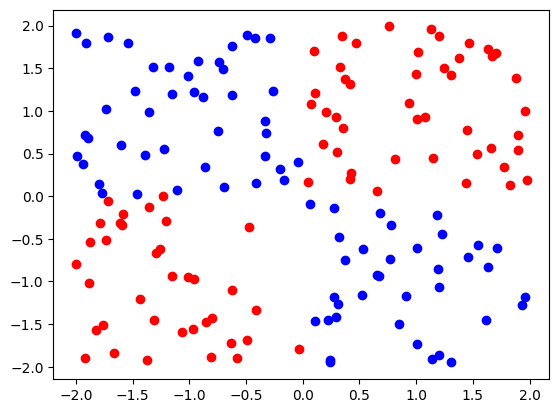

In [4]:
# Create XOR Dataset
from sklearn.model_selection import train_test_split

X = np.random.uniform(low=-2, high=2, size=(200,2) );
y = (X[:,0]*X[:,1] < 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter( X_train[np.where(y_train==0),0] , X_train[np.where(y_train==0),1], c='r')
plt.scatter( X_train[np.where(y_train==1),0] , X_train[np.where(y_train==1),1], c='b')

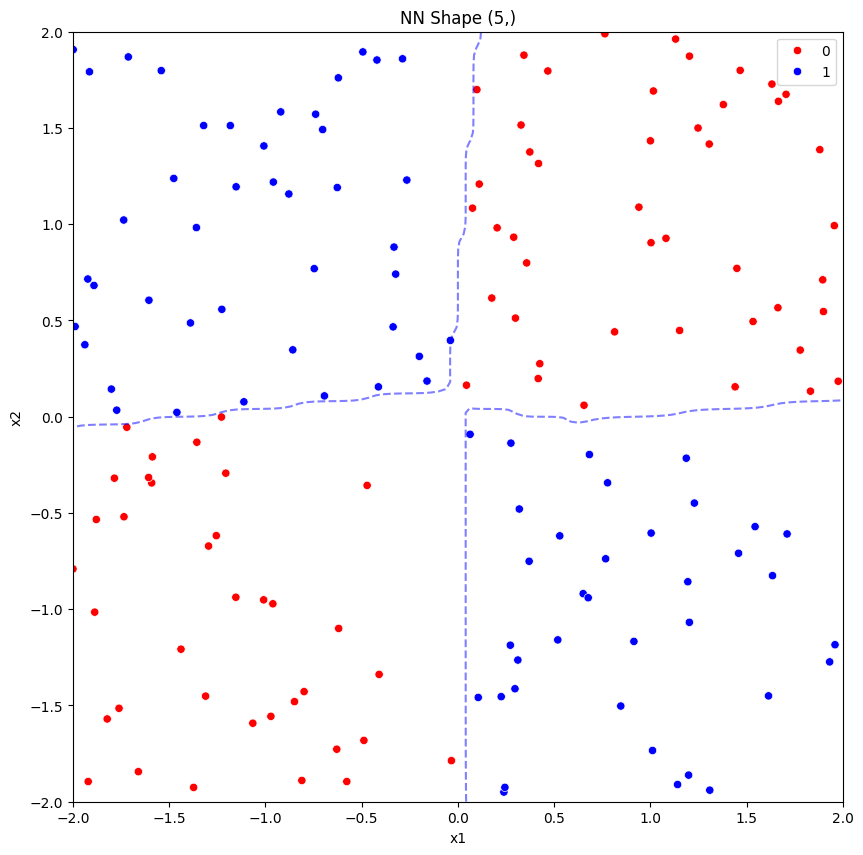

In [5]:
clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(5))
clf.fit(X_train, y_train)

plot_classifier(clf,X_train,y_train)
plt.title('NN Shape (5,)')
plt.savefig("figures/xor_5_clf.jpg")

In [6]:
N_ITER = 100
network_shape = (5,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_train, y_train)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_train, y_train)



Avg Convergence after: 129.4


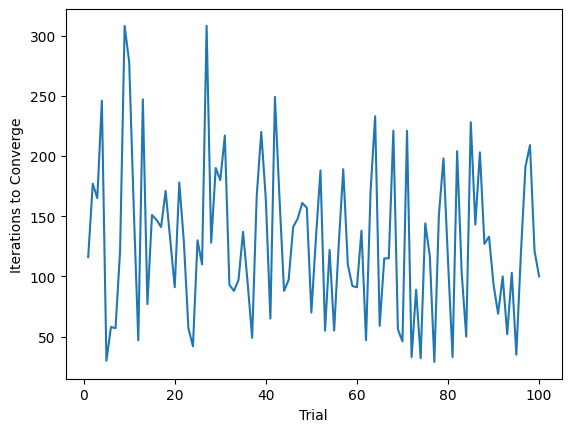

In [7]:
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.savefig("figures/xor_5_conv.jpg")
print(f"Avg Convergence after: {np.mean(plt_conv)}")

Avg Acc after: 0.9836250000000001


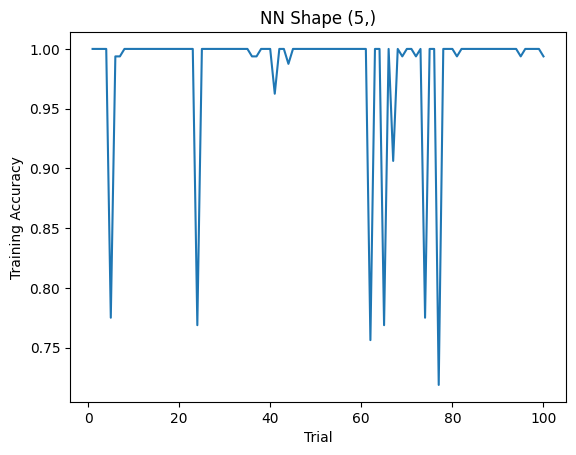

In [8]:
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/xor_5_acc.jpg")
print(f"Avg Acc after: {np.mean(plt_acc)}")

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 117.5
Avg Acc after: 0.9521250000000001 Max Acc: 1.0


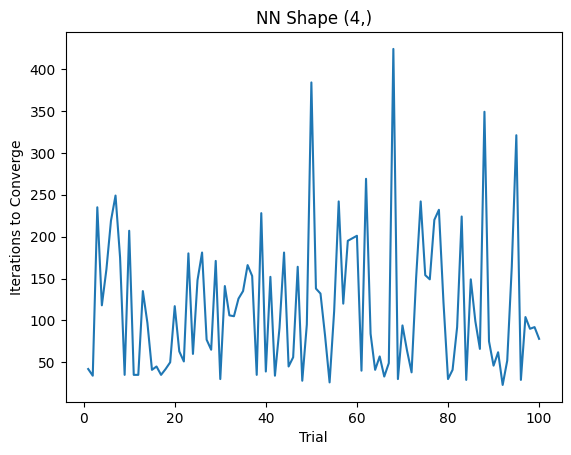

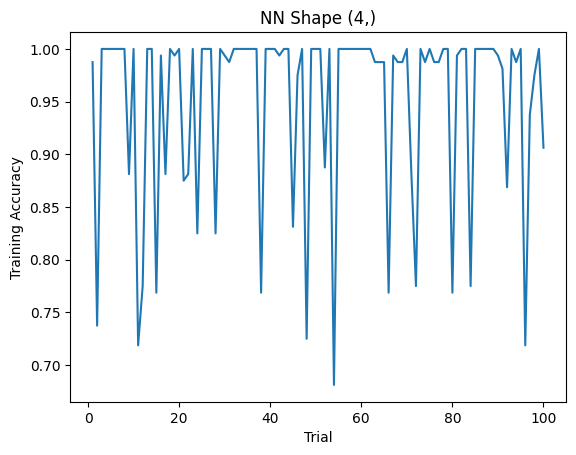

<Figure size 640x480 with 0 Axes>

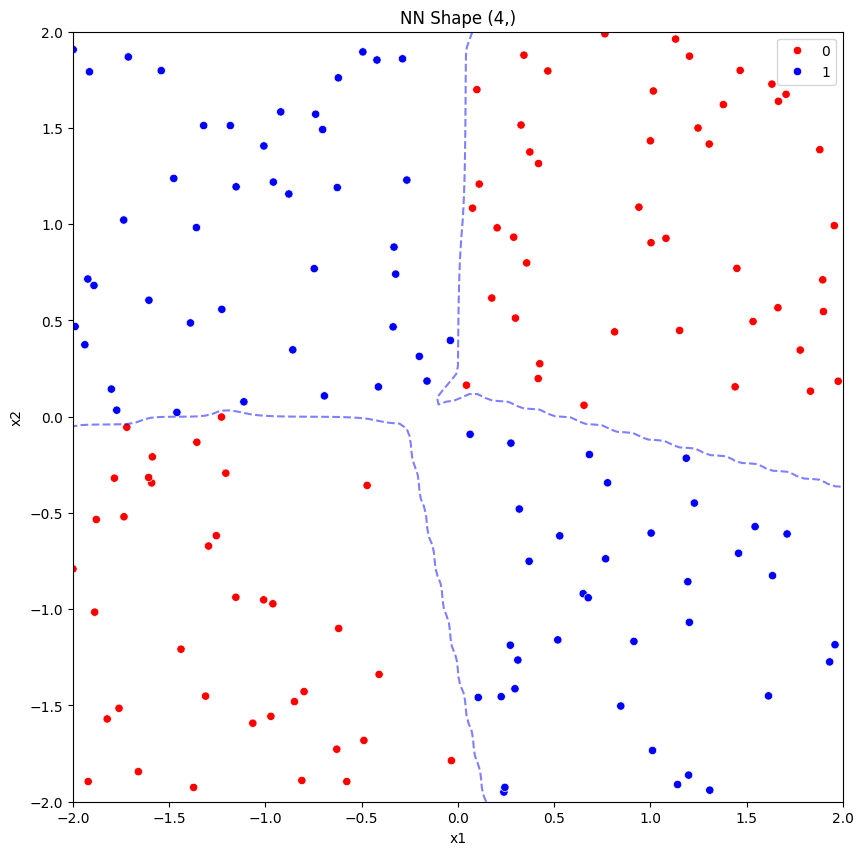

In [9]:
import copy

N_ITER = 100
network_shape = (4,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_train, y_train)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_train, y_train)
    if( plt_acc[ clf_idx] == 1.0 ):
        clf_XOR_4_100 = copy.deepcopy( clf )
        
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (4,)')
plt.savefig("figures/xor_4_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (4,)')
plt.savefig("figures/xor_4_acc.jpg")
plt.figure()
plot_classifier(clf_XOR_4_100,X_train,y_train)
plt.title('NN Shape (4,)')
plt.savefig("figures/xor_4_clf.jpg")

Avg Convergence after: 99.73
Avg Acc after: 0.9056875 Max Acc: 1.0


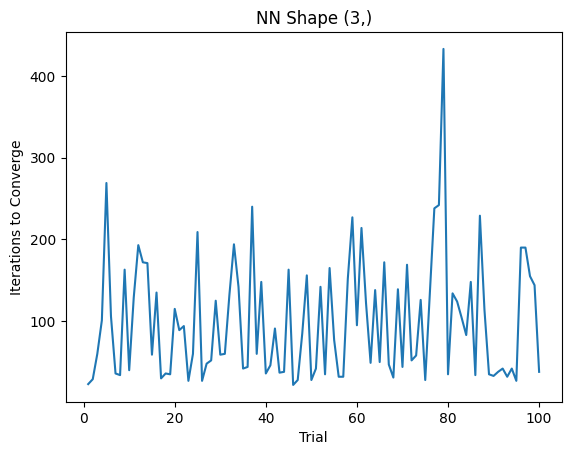

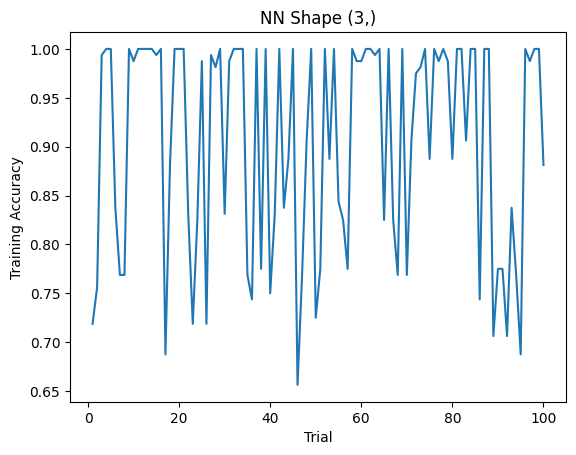

<Figure size 640x480 with 0 Axes>

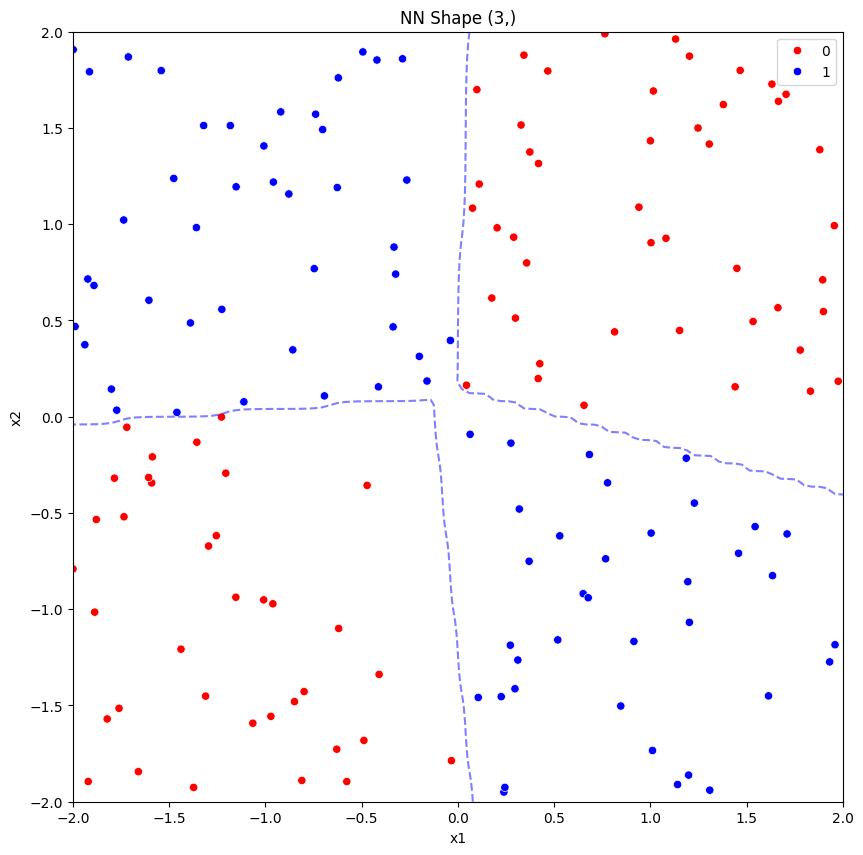

In [10]:
import copy
N_ITER = 100
network_shape = (3,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_train, y_train)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_train, y_train)
    if( plt_acc[ clf_idx] == 1.0 ):
        clf_XOR_3_100 = copy.deepcopy( clf )
    
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (3,)')
plt.savefig("figures/xor_3_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (3,)')
plt.savefig("figures/xor_3_acc.jpg")
plt.figure()
plot_classifier(clf_XOR_3_100,X_train,y_train)
plt.title('NN Shape (3,)')
plt.savefig("figures/xor_3_clf.jpg")

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 36.7
Avg Acc after: 0.7657499999999999 Max Acc: 0.8875


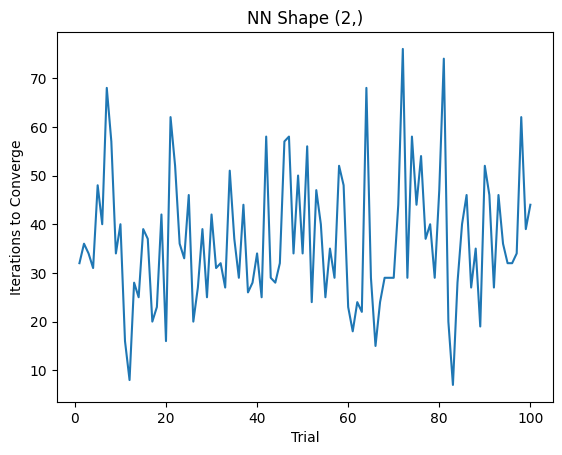

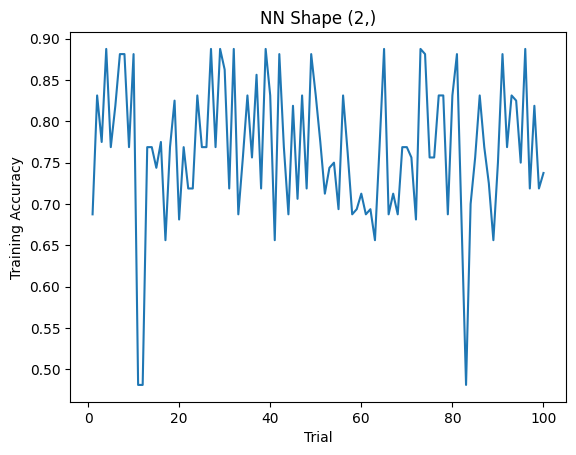

<Figure size 640x480 with 0 Axes>

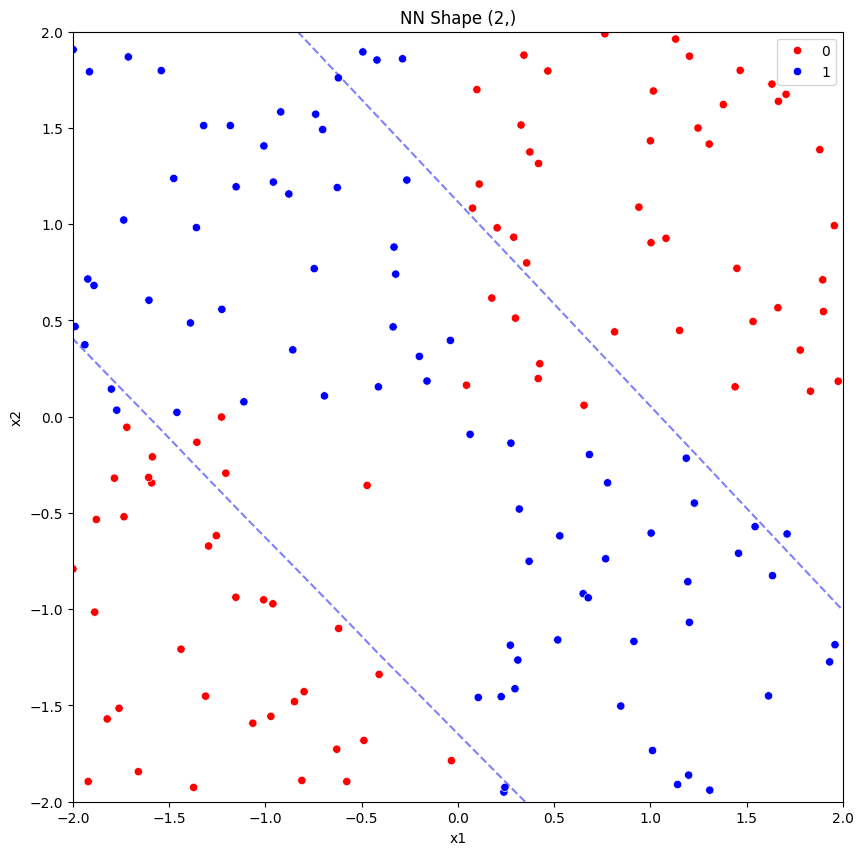

In [11]:
import copy
N_ITER = 100
network_shape = (2,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0.0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_train, y_train)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_train, y_train)
    if( plt_acc[ clf_idx] > max_acc ):
        max_acc = plt_acc[clf_idx]
        clf_XOR_2_100 = copy.deepcopy( clf )
    
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (2,)')
plt.savefig("figures/xor_2_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (2,)')
plt.savefig("figures/xor_2_acc.jpg")
plt.figure()
plot_classifier(clf_XOR_2_100,X_train,y_train)
plt.title('NN Shape (2,)')
plt.savefig("figures/xor_2_clf.jpg")

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 133.4
Avg Acc after: 0.95825 Max Acc: 1.0


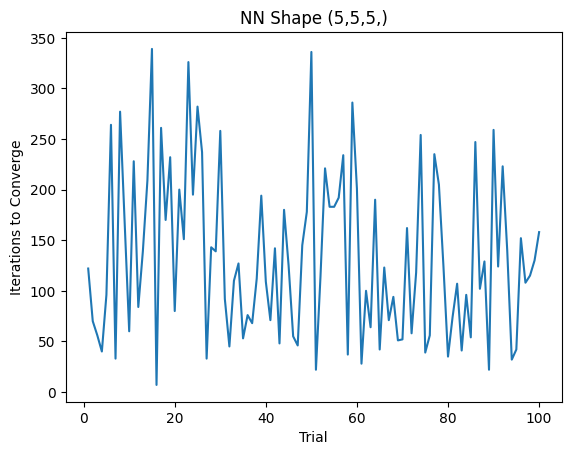

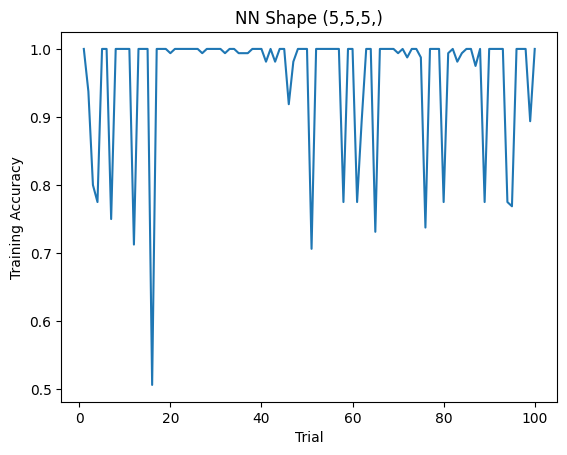

<Figure size 640x480 with 0 Axes>

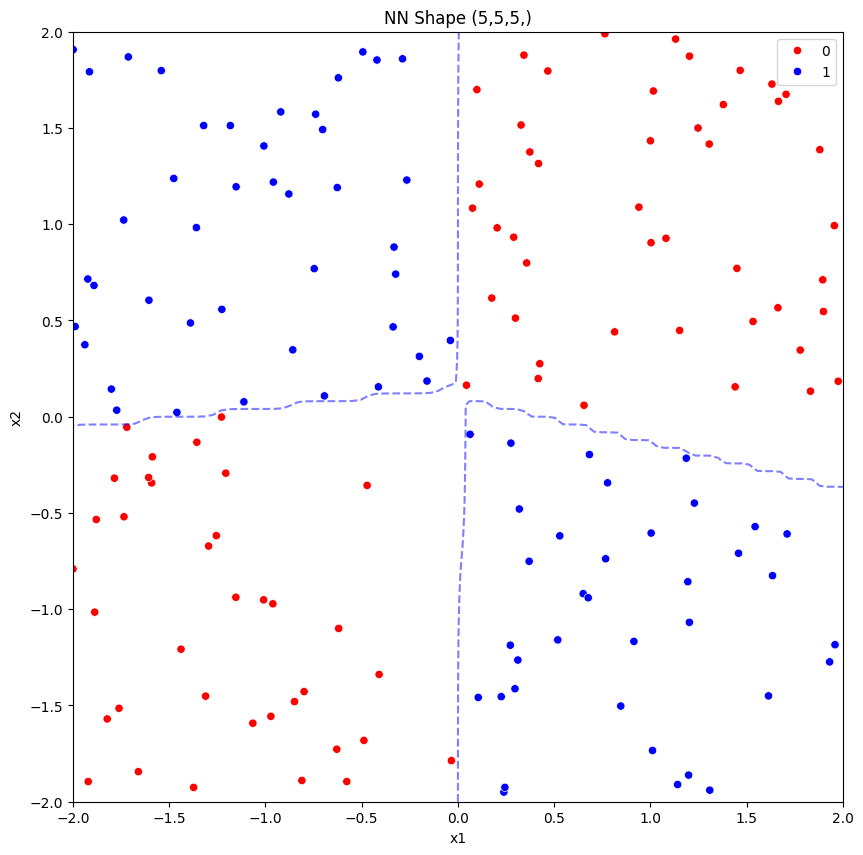

In [12]:
import copy
N_ITER = 100
network_shape = (5,5,5)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_train, y_train)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_train, y_train)
    if( plt_acc[ clf_idx] == 1.0 ):
        clf_XOR_3_100 = copy.deepcopy( clf )
    
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/xor_555_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/xor_555_acc.jpg")
plt.figure()
plot_classifier(clf_XOR_3_100,X_train,y_train)
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/xor_555_clf.jpg")

Avg Convergence after: [ 139.36 1469.02 1865.84]
Avg Acc after: [0.9785   0.991625 0.998375]


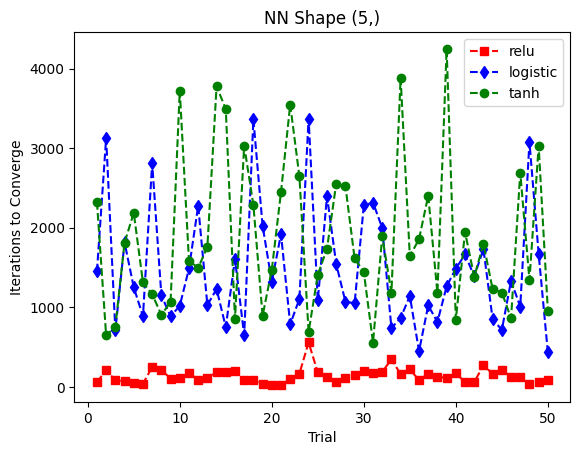

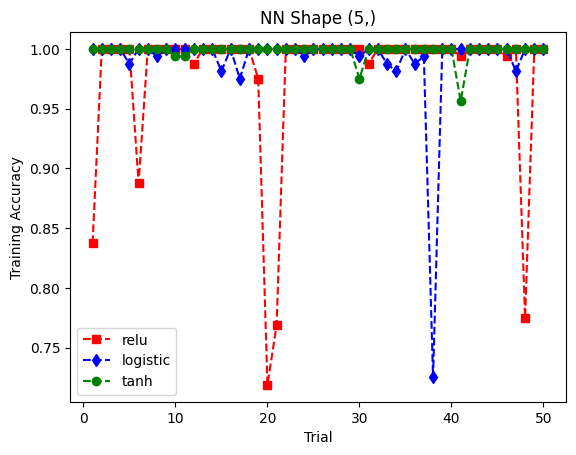

In [13]:
import copy
N_ITER = 50
ACTIVATIONS = ['relu', 'logistic', 'tanh' ]
ACTIVATIONS_LINESPEC = ['rs--', 'bd--', 'go--' ]
N_ACTIVATIONS = len(ACTIVATIONS)
network_shape = (5,)
plt_conv = np.zeros((N_ACTIVATIONS, N_ITER))
plt_acc  = np.zeros((N_ACTIVATIONS, N_ITER))
for activation_idx, activation in enumerate( ACTIVATIONS ):
    for clf_idx in range(N_ITER):
        clf = MLPClassifier( solver='lbfgs', activation=activation, max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
        clf.fit(X_train, y_train)
    
        plt_conv[activation_idx][clf_idx] = clf.n_iter_
        plt_acc[ activation_idx][clf_idx] = clf.score(X_train, y_train)
    

print(f"Avg Convergence after: {np.mean(plt_conv, axis=1)}")
print(f"Avg Acc after: {np.mean(plt_acc,axis=1)}")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,)')
plt.savefig("figures/xor_5_activation_conv.jpg")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/xor_5_activation_acc.jpg")

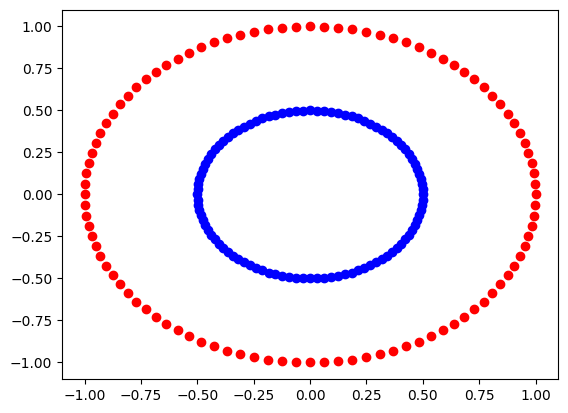

In [14]:
from sklearn.datasets import make_circles
X_05,y_05 = make_circles(n_samples=200, shuffle=True, factor = 0.5 )


plt.scatter( X_05[np.where(y_05==0),0] , X_05[np.where(y_05==0),1], c='r')
plt.scatter( X_05[np.where(y_05==1),0] , X_05[np.where(y_05==1),1], c='b')

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 111.66
Avg Acc after: 0.9322 Max Acc: 1.0


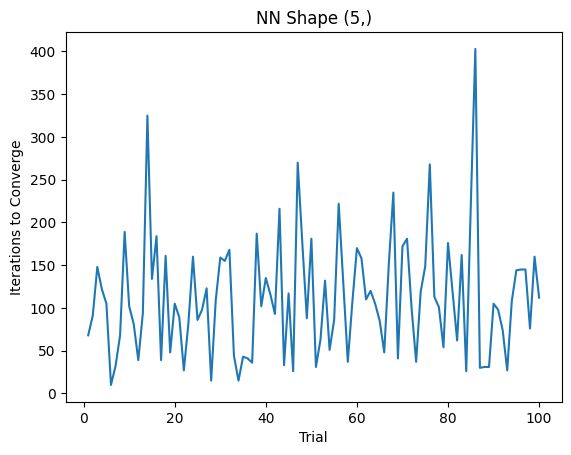

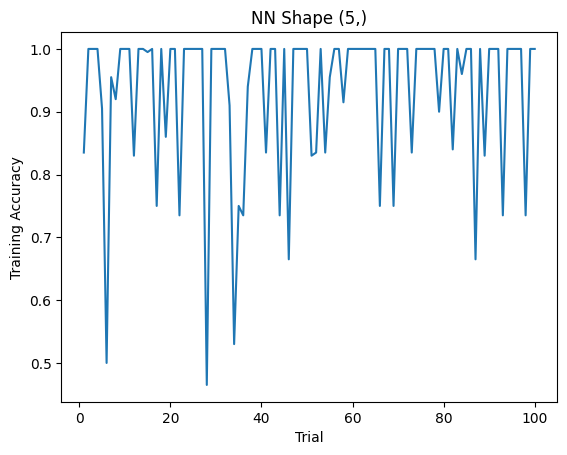

<Figure size 640x480 with 0 Axes>

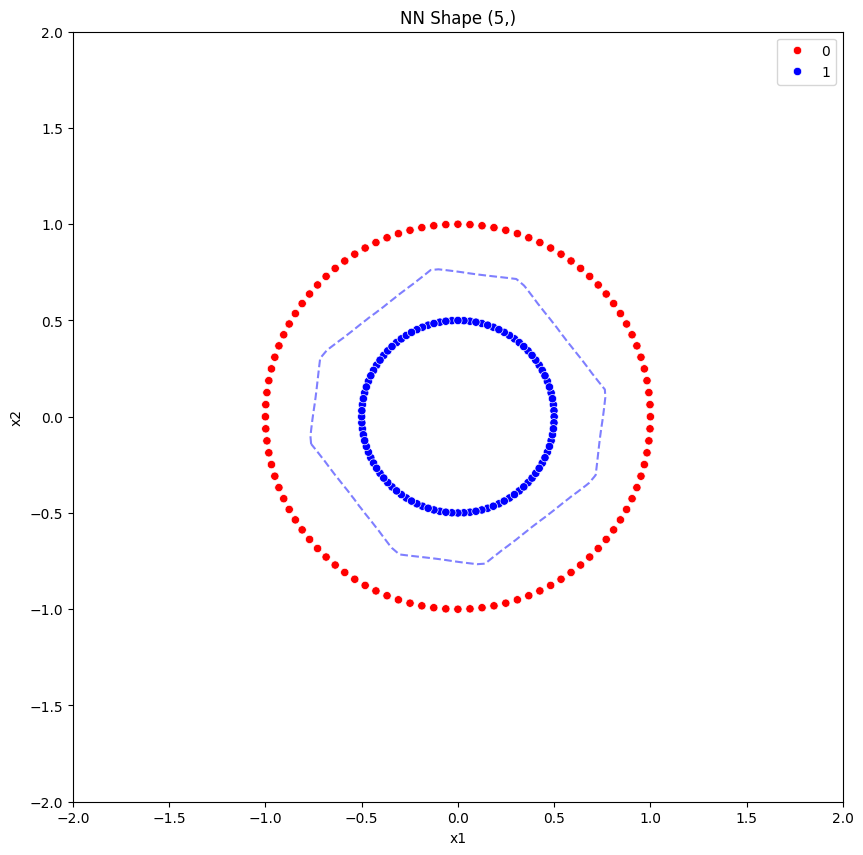

In [15]:
import copy
N_ITER = 100
network_shape = (5,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_05, y_05)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_05, y_05)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_5_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir05_5_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir05_5_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_5_100,X_05,y_05)
plt.title('NN Shape (5,)')
plt.savefig("figures/cir05_5_clf.jpg")


Avg Convergence after: 95.92
Avg Acc after: 0.9067000000000001 Max Acc: 1.0


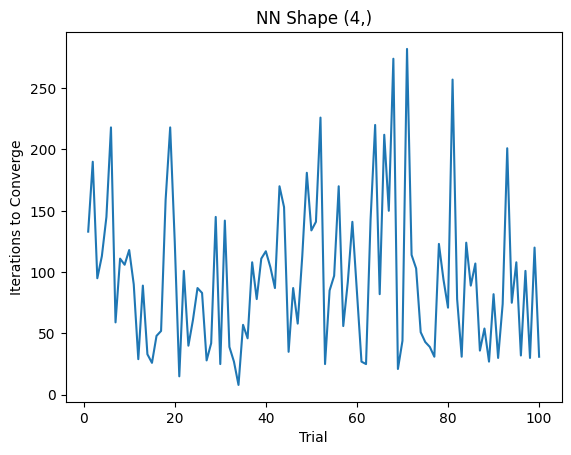

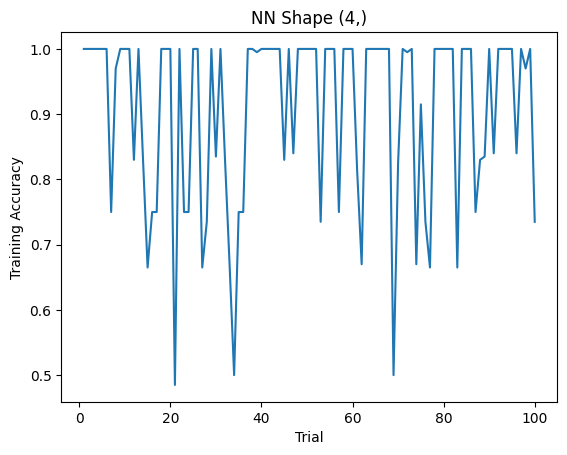

<Figure size 640x480 with 0 Axes>

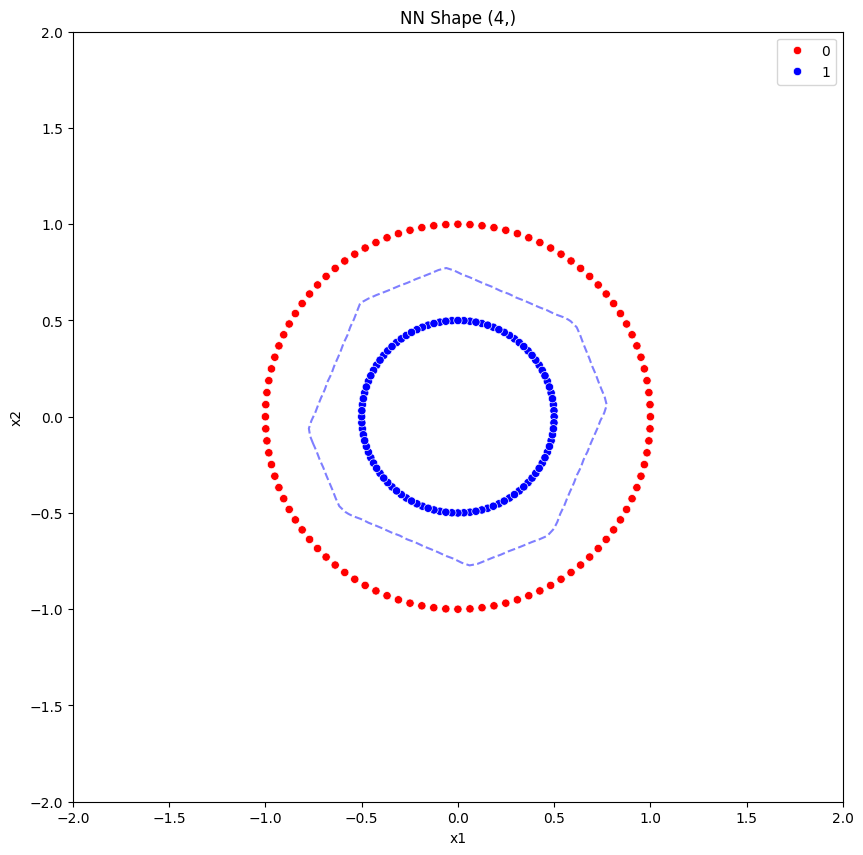

In [16]:
import copy
N_ITER = 100
network_shape = (4,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_05, y_05)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_05, y_05)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_4_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]
    
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (4,)')
plt.savefig("figures/cir05_4_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (4,)')
plt.savefig("figures/cir05_4_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_4_100,X_05,y_05)
plt.title('NN Shape (4,)')
plt.savefig("figures/cir05_4_clf.jpg")

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 68.73
Avg Acc after: 0.8145499999999999 Max Acc: 1.0


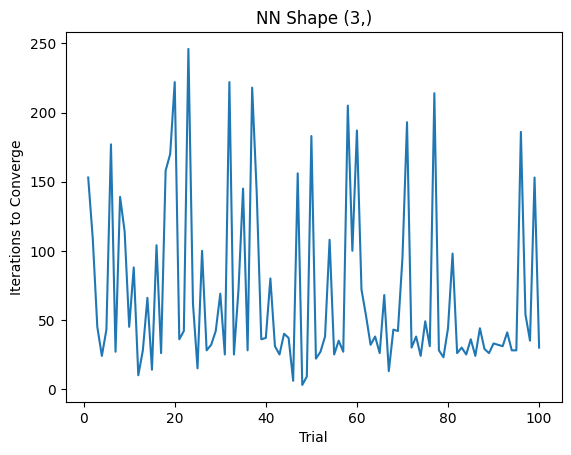

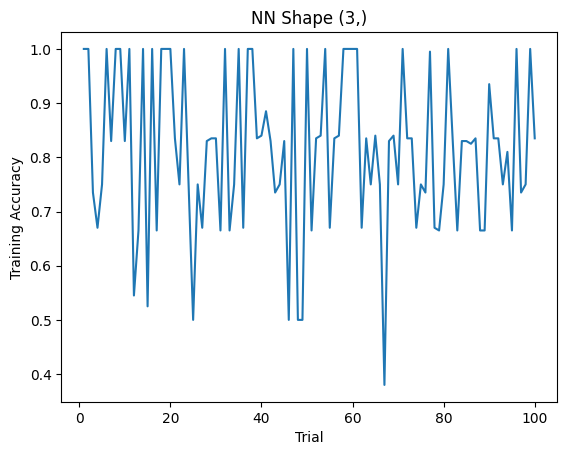

<Figure size 640x480 with 0 Axes>

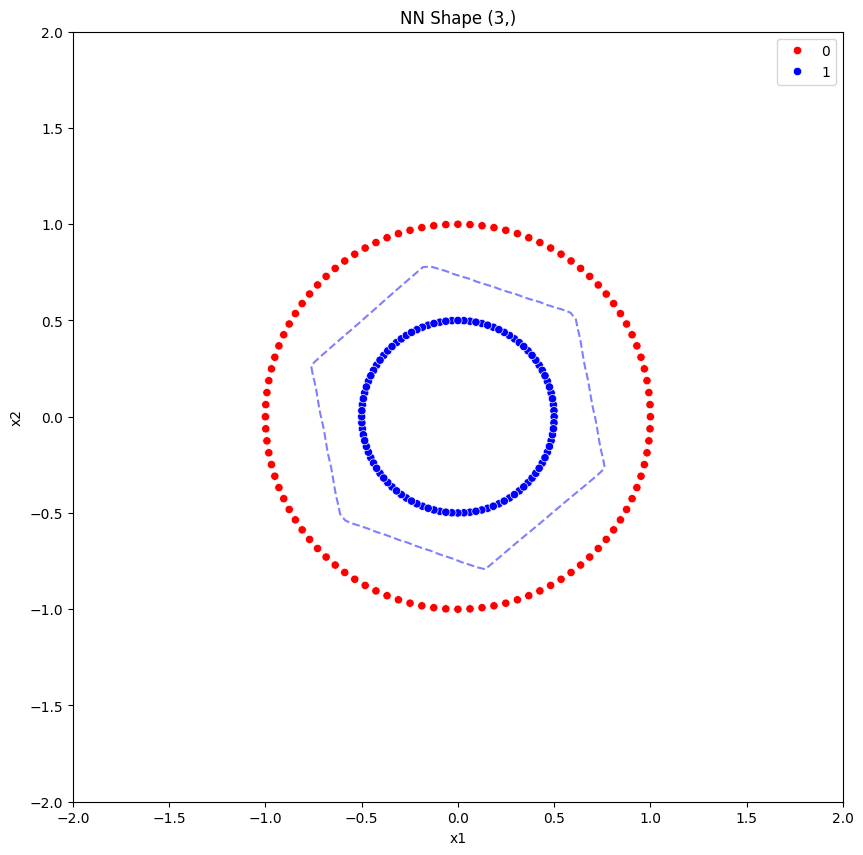

In [17]:
import copy
N_ITER = 100
network_shape = (3,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_05, y_05)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_05, y_05)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_3_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]
    
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (3,)')
plt.savefig("figures/cir05_3_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (3,)')
plt.savefig("figures/cir05_3_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_3_100,X_05,y_05)
plt.title('NN Shape (3,)')
plt.savefig("figures/cir05_3_clf.jpg")

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 32.94
Avg Acc after: 0.6983499999999999 Max Acc: 0.84


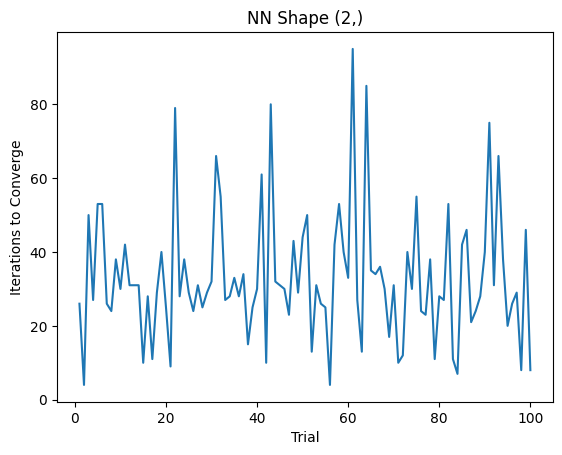

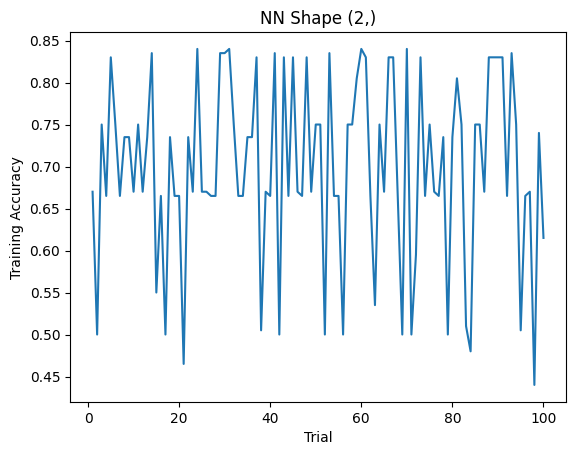

<Figure size 640x480 with 0 Axes>

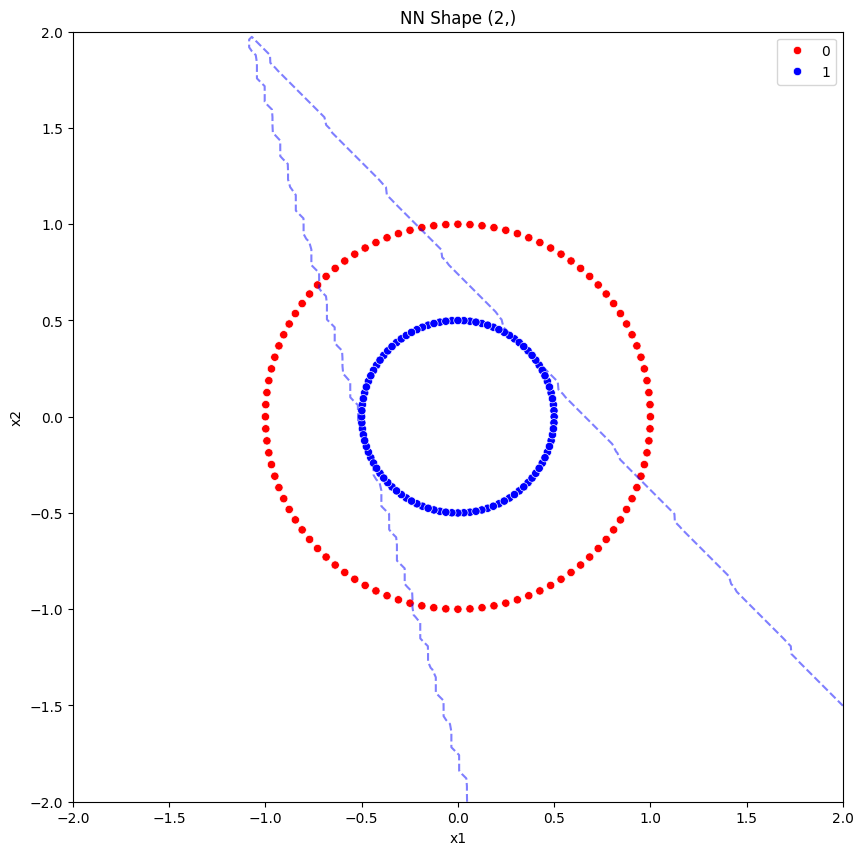

In [18]:
import copy
N_ITER = 100
network_shape = (2,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_05, y_05)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_05, y_05)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_2_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]
    
print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (2,)')
plt.savefig("figures/cir05_2_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (2,)')
plt.savefig("figures/cir05_2_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_2_100,X_05,y_05)
plt.title('NN Shape (2,)')
plt.savefig("figures/cir05_2_clf.jpg")

Avg Convergence after: [119.8  185.5  181.82]
Avg Acc after: [0.9439 0.9966 1.    ]


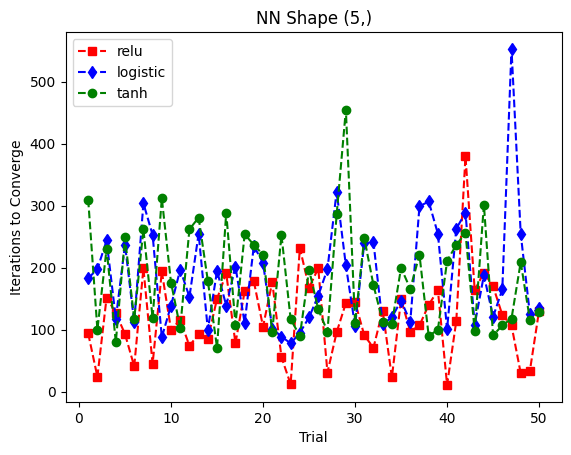

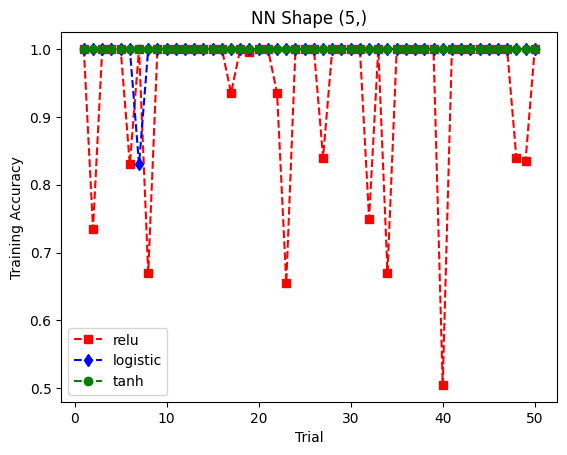

In [19]:
import copy
N_ITER = 50
ACTIVATIONS = ['relu', 'logistic', 'tanh' ]
ACTIVATIONS_LINESPEC = ['rs--', 'bd--', 'go--' ]
N_ACTIVATIONS = len(ACTIVATIONS)
network_shape = (5,)
plt_conv = np.zeros((N_ACTIVATIONS, N_ITER))
plt_acc  = np.zeros((N_ACTIVATIONS, N_ITER))
for activation_idx, activation in enumerate( ACTIVATIONS ):
    for clf_idx in range(N_ITER):
        clf = MLPClassifier( solver='lbfgs', activation=activation, max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
        clf.fit(X_05, y_05)
    
        plt_conv[activation_idx][clf_idx] = clf.n_iter_
        plt_acc[ activation_idx][clf_idx] = clf.score(X_05, y_05)
    

print(f"Avg Convergence after: {np.mean(plt_conv, axis=1)}")
print(f"Avg Acc after: {np.mean(plt_acc,axis=1)}")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir05_5_activation_conv.jpg")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir05_5_activation_acc.jpg")

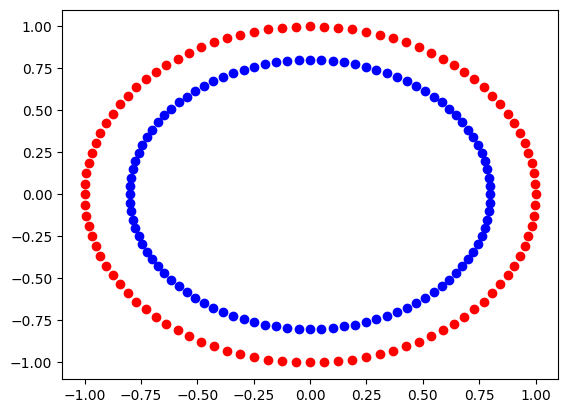

In [20]:
X_08,y_08 = make_circles(n_samples=200, shuffle=True, factor = 0.8 )


plt.scatter( X_08[np.where(y_08==0),0] , X_08[np.where(y_08==0),1], c='r')
plt.scatter( X_08[np.where(y_08==1),0] , X_08[np.where(y_08==1),1], c='b')

Avg Convergence after: 175.79
Avg Acc after: 0.8693499999999998 Max Acc: 1.0


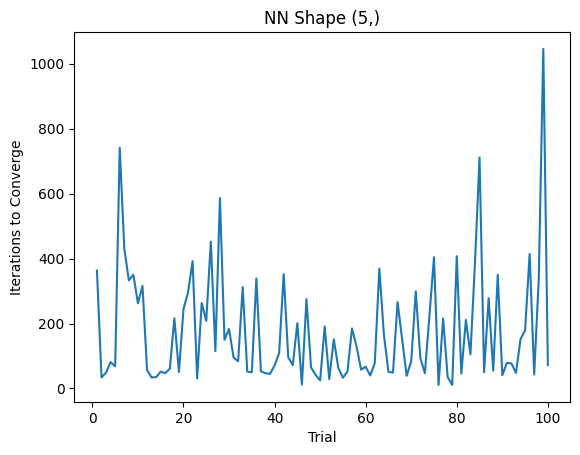

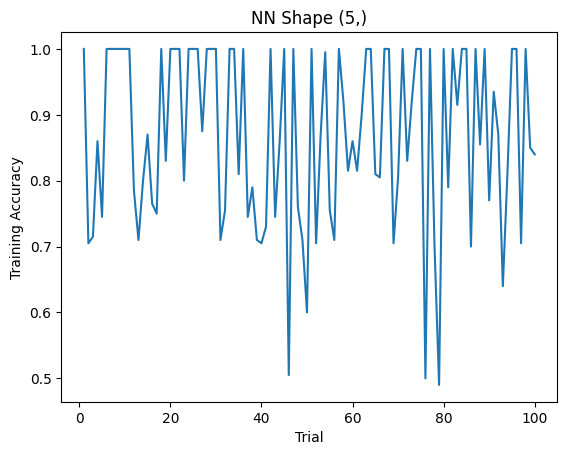

<Figure size 640x480 with 0 Axes>

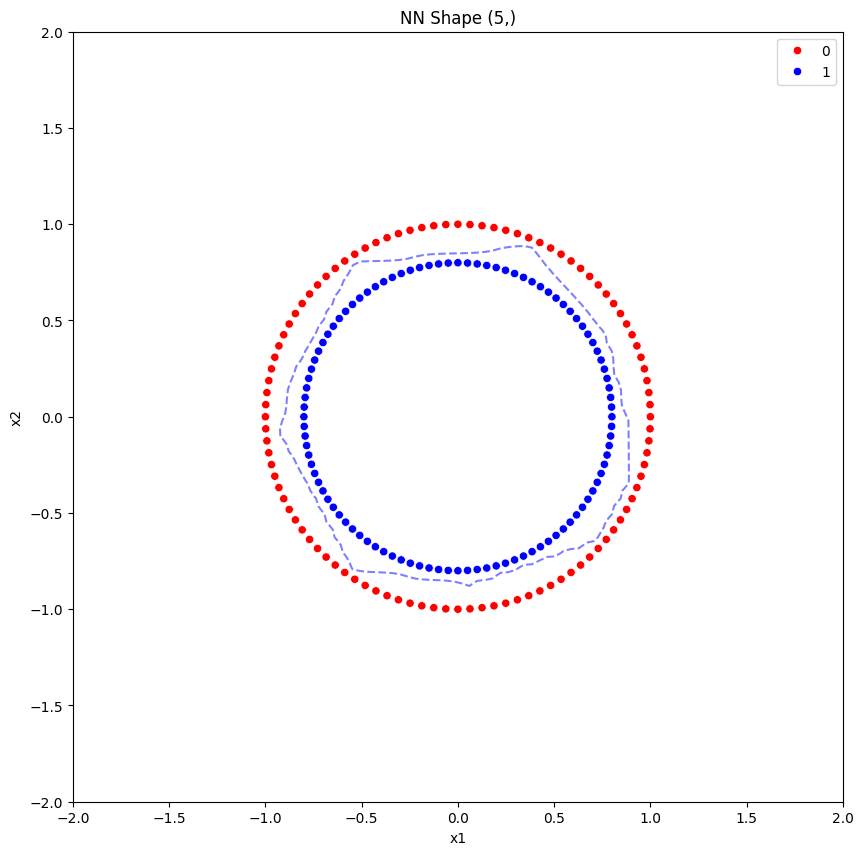

In [21]:
import copy
N_ITER = 100
network_shape = (5,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_08, y_08)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_08, y_08)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_5_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir08_5_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir08_5_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_5_100,X_08,y_08)
plt.title('NN Shape (5,)')
plt.savefig("figures/cir08_5_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 126.91
Avg Acc after: 0.7827999999999998 Max Acc: 1.0


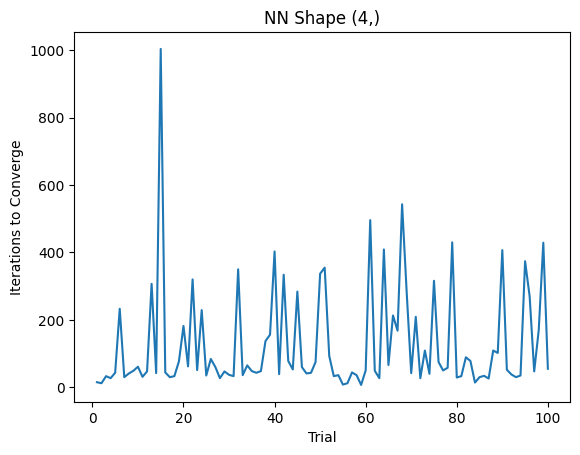

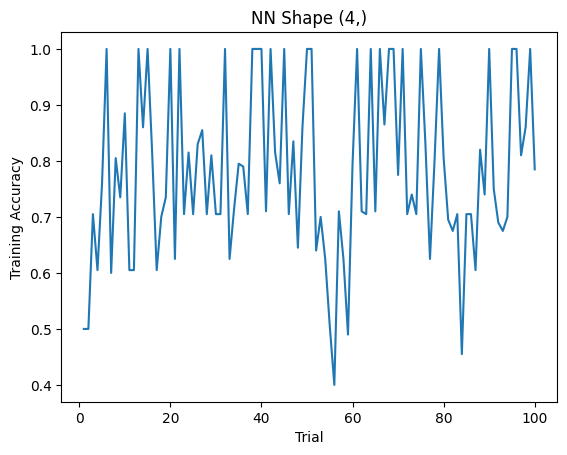

<Figure size 640x480 with 0 Axes>

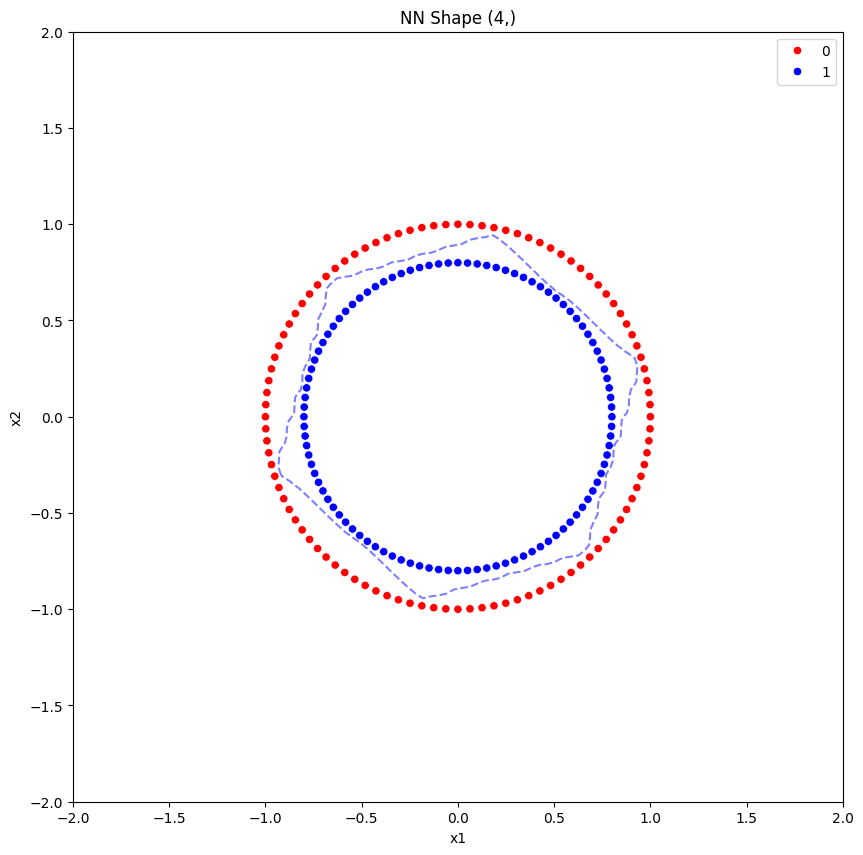

In [22]:
import copy
N_ITER = 100
network_shape = (4,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_08, y_08)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_08, y_08)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_4_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (4,)')
plt.savefig("figures/cir08_4_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (4,)')
plt.savefig("figures/cir08_4_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_4_100,X_08,y_08)
plt.title('NN Shape (4,)')
plt.savefig("figures/cir08_4_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 72.69
Avg Acc after: 0.7043 Max Acc: 1.0


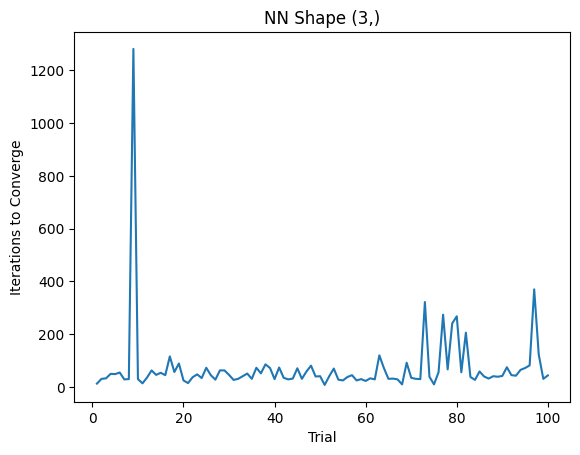

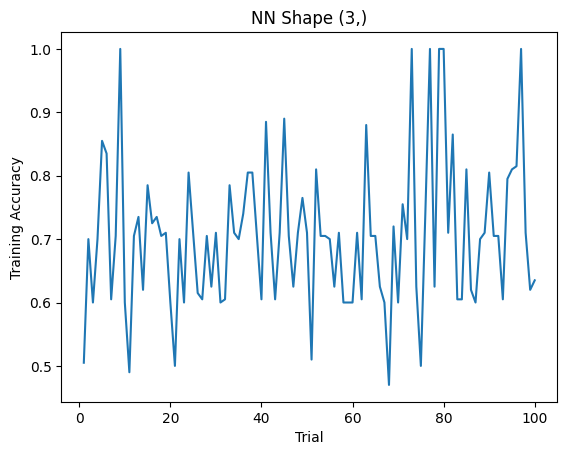

<Figure size 640x480 with 0 Axes>

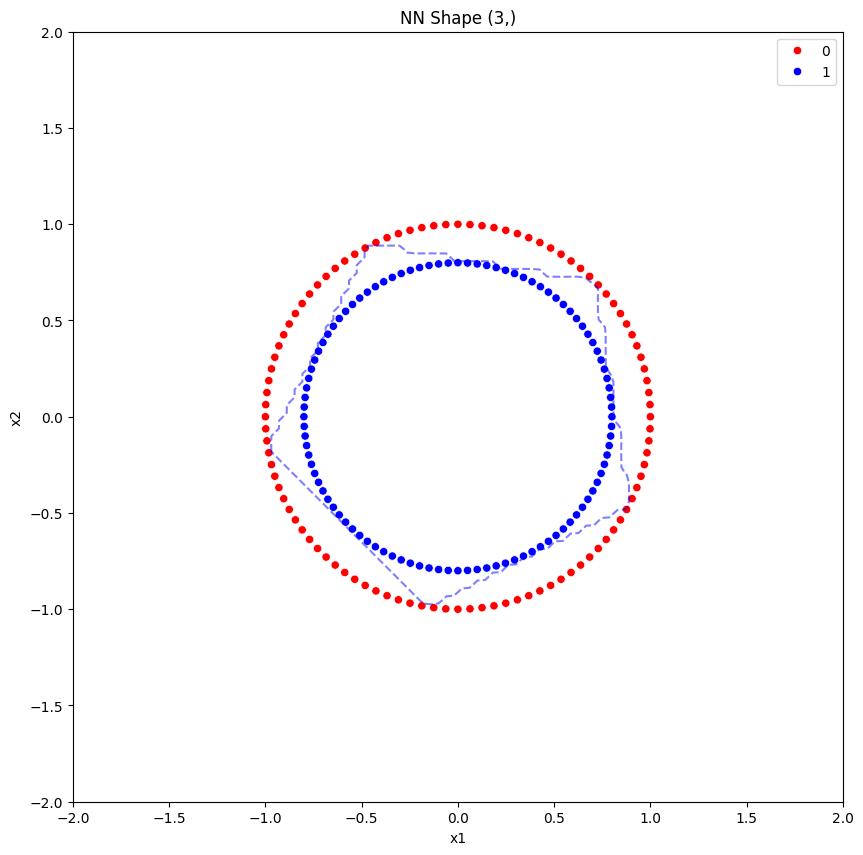

In [23]:
import copy
N_ITER = 100
network_shape = (3,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_08, y_08)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_08, y_08)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_3_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (3,)')
plt.savefig("figures/cir08_3_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (3,)')
plt.savefig("figures/cir08_3_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_3_100,X_08,y_08)
plt.title('NN Shape (3,)')
plt.savefig("figures/cir08_3_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 32.75
Avg Acc after: 0.61225 Max Acc: 0.71


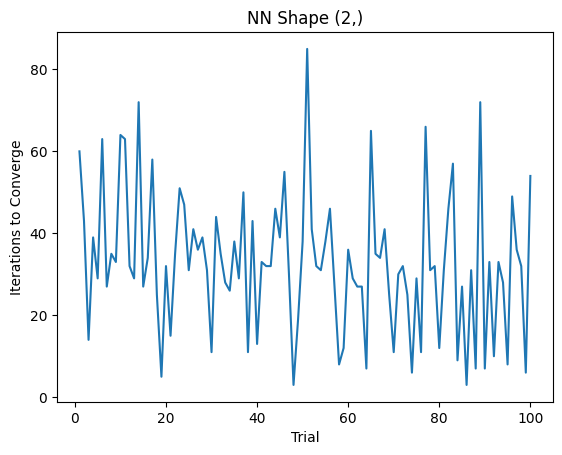

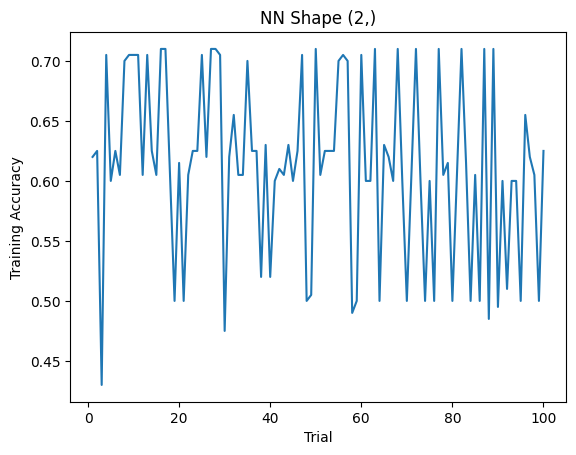

<Figure size 640x480 with 0 Axes>

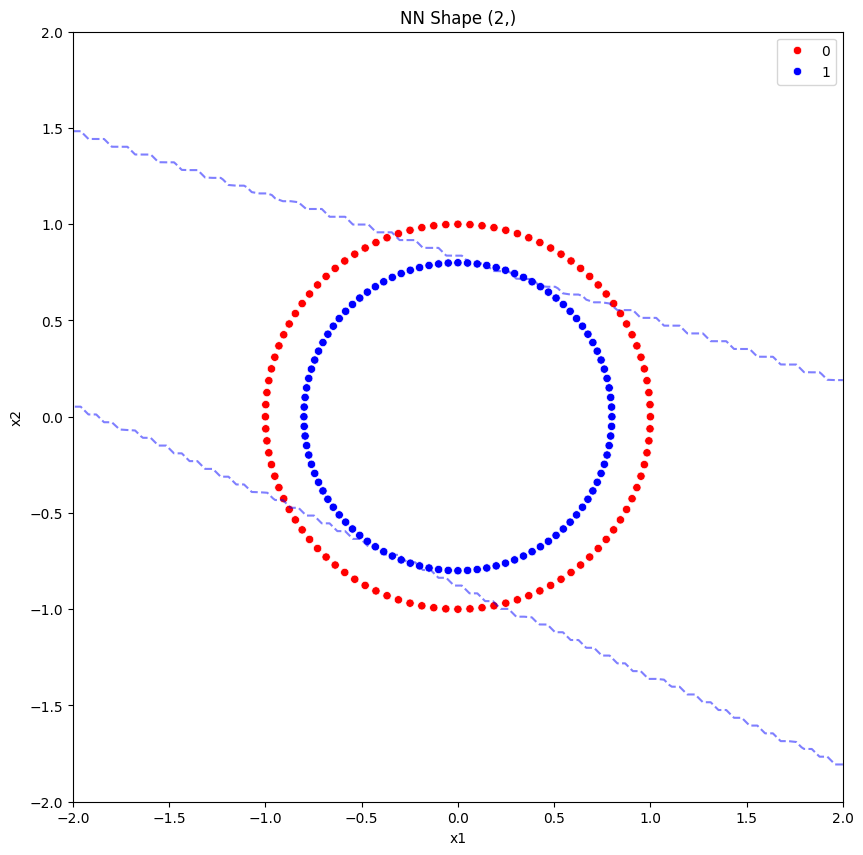

In [24]:
import copy
N_ITER = 100
network_shape = (2,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_08, y_08)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_08, y_08)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_2_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (2,)')
plt.savefig("figures/cir08_2_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (2,)')
plt.savefig("figures/cir08_2_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_2_100,X_08,y_08)
plt.title('NN Shape (2,)')
plt.savefig("figures/cir08_2_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 211.59
Avg Acc after: 0.8774000000000001 Max Acc: 1.0


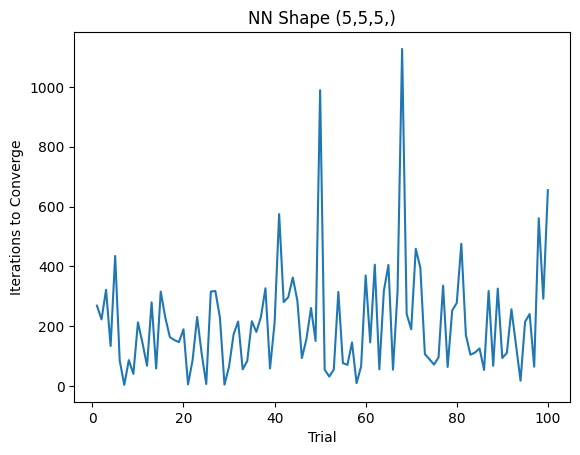

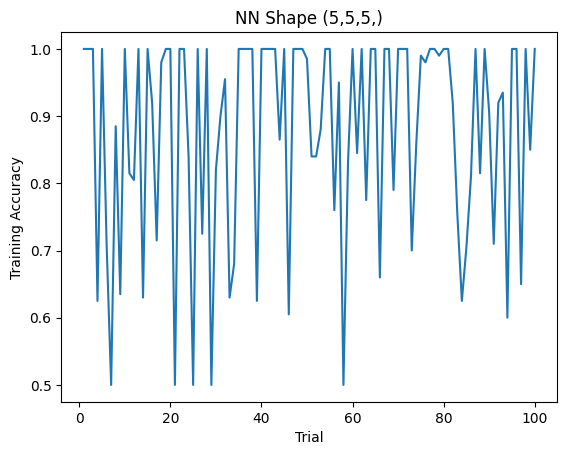

<Figure size 640x480 with 0 Axes>

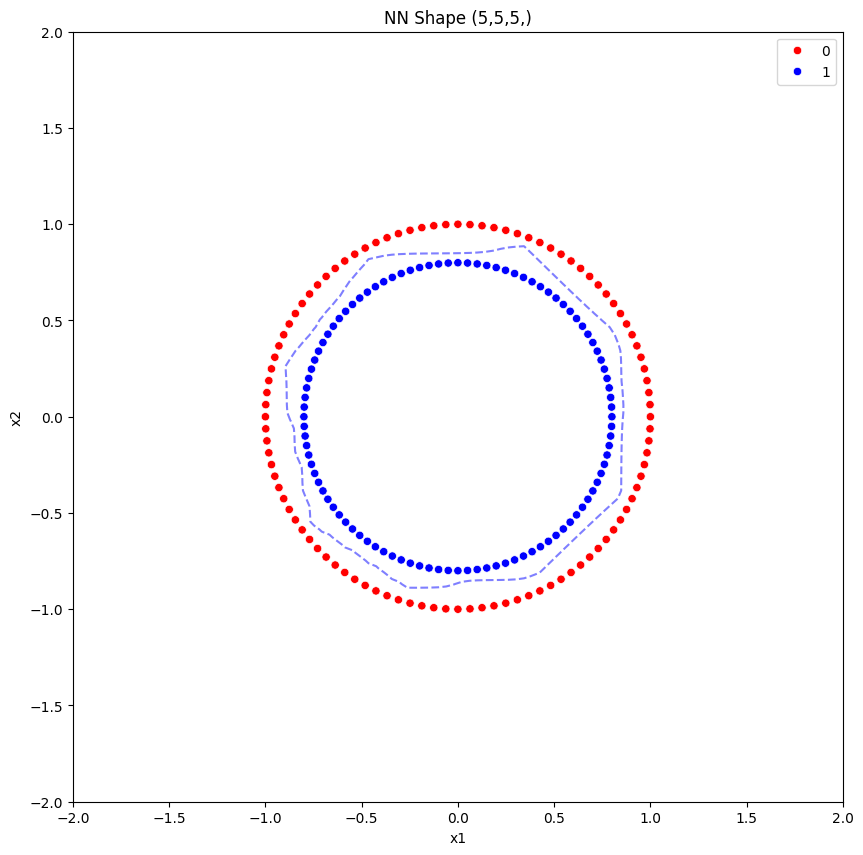

In [25]:
import copy
N_ITER = 100
network_shape = (5,5,5,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_08, y_08)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_08, y_08)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_555_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/cir08_555_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/cir08_555_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_555_100,X_08,y_08)
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/cir08_555_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: [ 178.68  970.42 1023.42]
Avg Acc after: [0.8704 0.9586 0.9456]


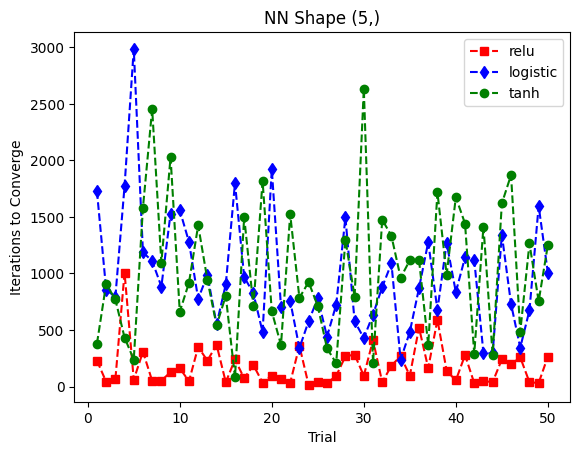

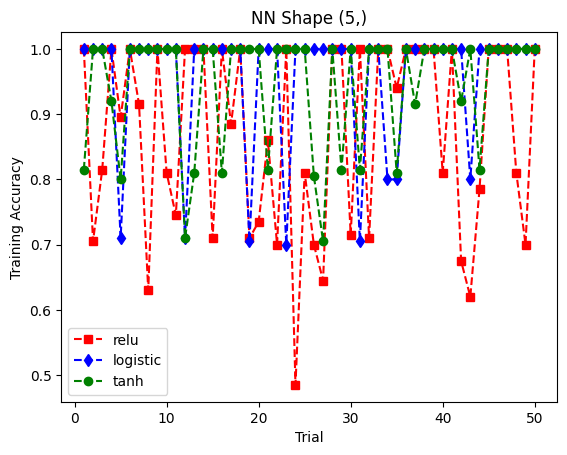

In [26]:
import copy
N_ITER = 50
ACTIVATIONS = ['relu', 'logistic', 'tanh' ]
ACTIVATIONS_LINESPEC = ['rs--', 'bd--', 'go--' ]
N_ACTIVATIONS = len(ACTIVATIONS)
network_shape = (5,)
plt_conv = np.zeros((N_ACTIVATIONS, N_ITER))
plt_acc  = np.zeros((N_ACTIVATIONS, N_ITER))
for activation_idx, activation in enumerate( ACTIVATIONS ):
    for clf_idx in range(N_ITER):
        clf = MLPClassifier( solver='lbfgs', activation=activation, max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
        clf.fit(X_08, y_08)
    
        plt_conv[activation_idx][clf_idx] = clf.n_iter_
        plt_acc[ activation_idx][clf_idx] = clf.score(X_08, y_08)
    

print(f"Avg Convergence after: {np.mean(plt_conv, axis=1)}")
print(f"Avg Acc after: {np.mean(plt_acc,axis=1)}")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir08_5_activation_conv.jpg")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir08_5_activation_acc.jpg")

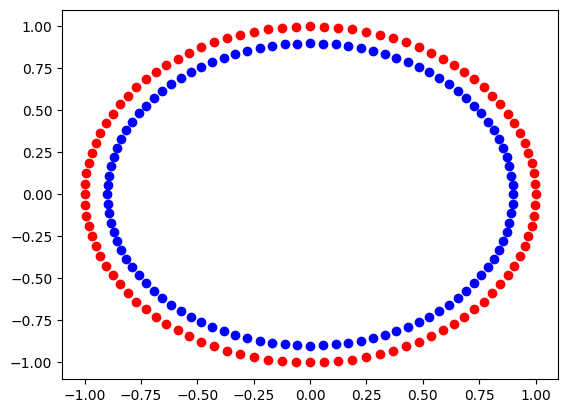

In [27]:
X_09,y_09 = make_circles(n_samples=200, shuffle=True, factor = 0.9 )


plt.scatter( X_09[np.where(y_09==0),0] , X_09[np.where(y_09==0),1], c='r')
plt.scatter( X_09[np.where(y_09==1),0] , X_09[np.where(y_09==1),1], c='b')

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 309.57
Avg Acc after: 0.8018499999999998 Max Acc: 1.0


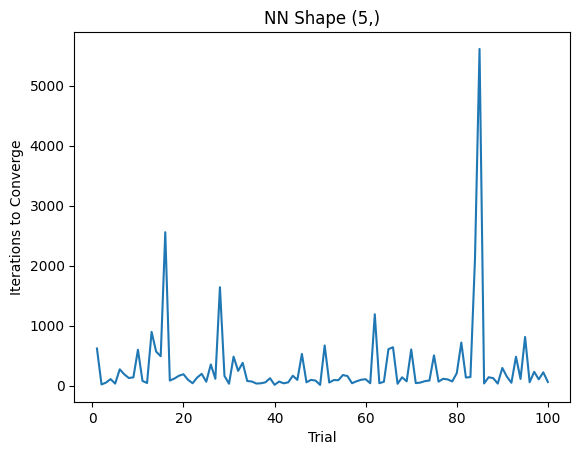

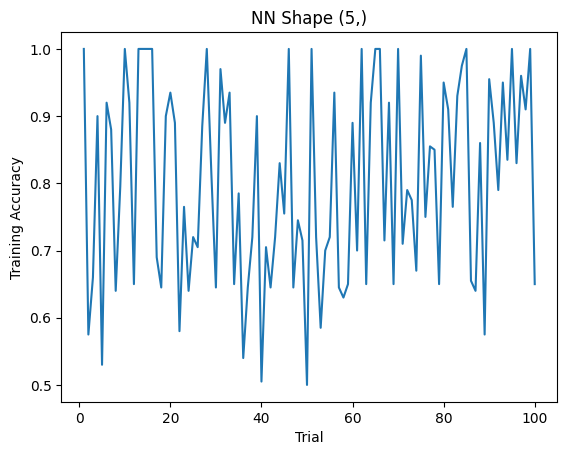

<Figure size 640x480 with 0 Axes>

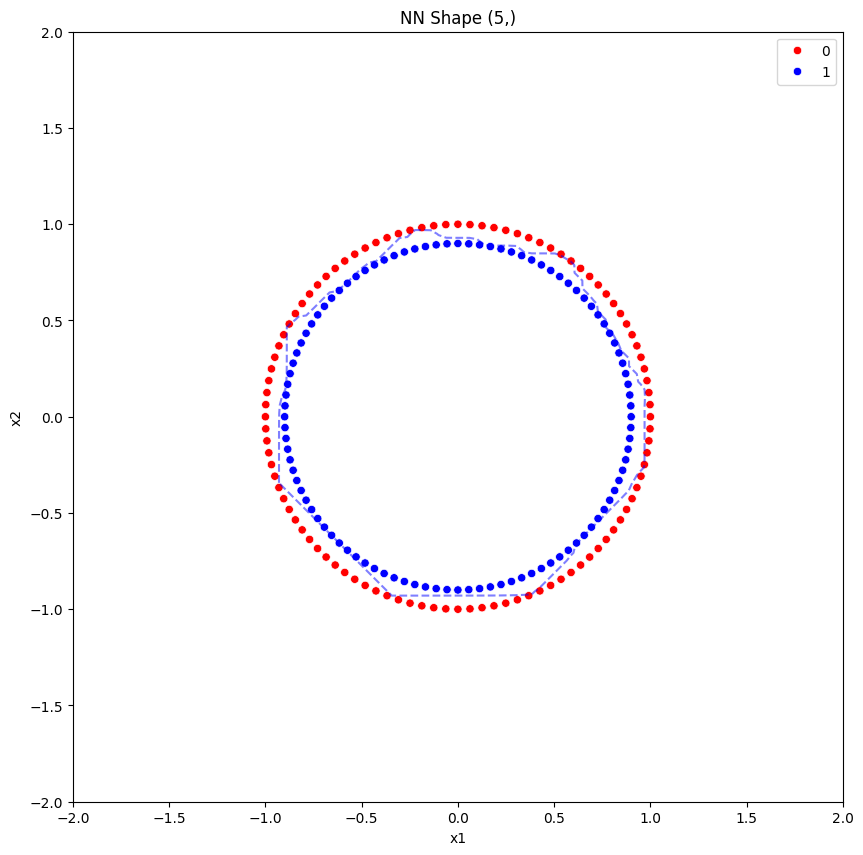

In [28]:
import copy
N_ITER = 100
H_SIZE = 5
network_shape = (H_SIZE,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_09, y_09)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_09, y_09)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_100,X_09,y_09)
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 93.46
Avg Acc after: 0.71575 Max Acc: 1.0


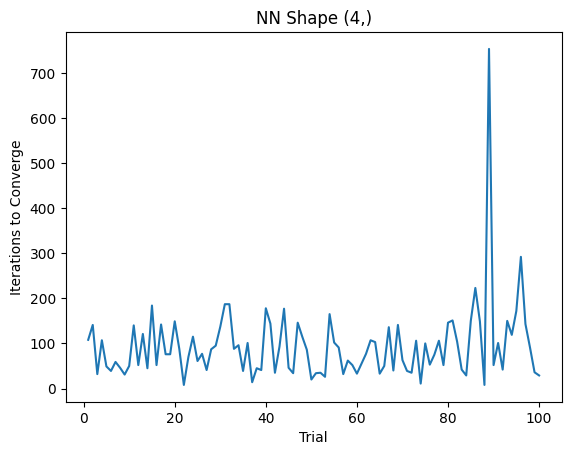

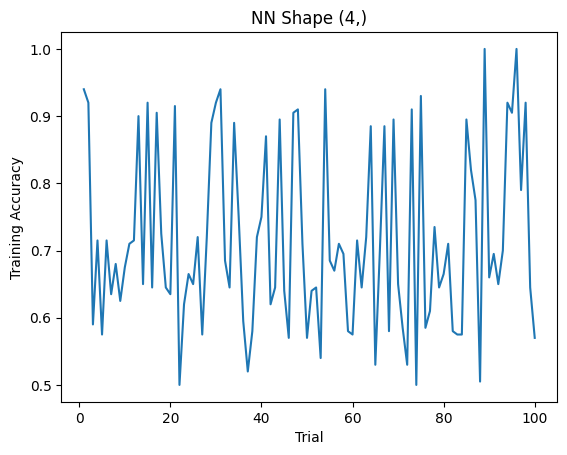

<Figure size 640x480 with 0 Axes>

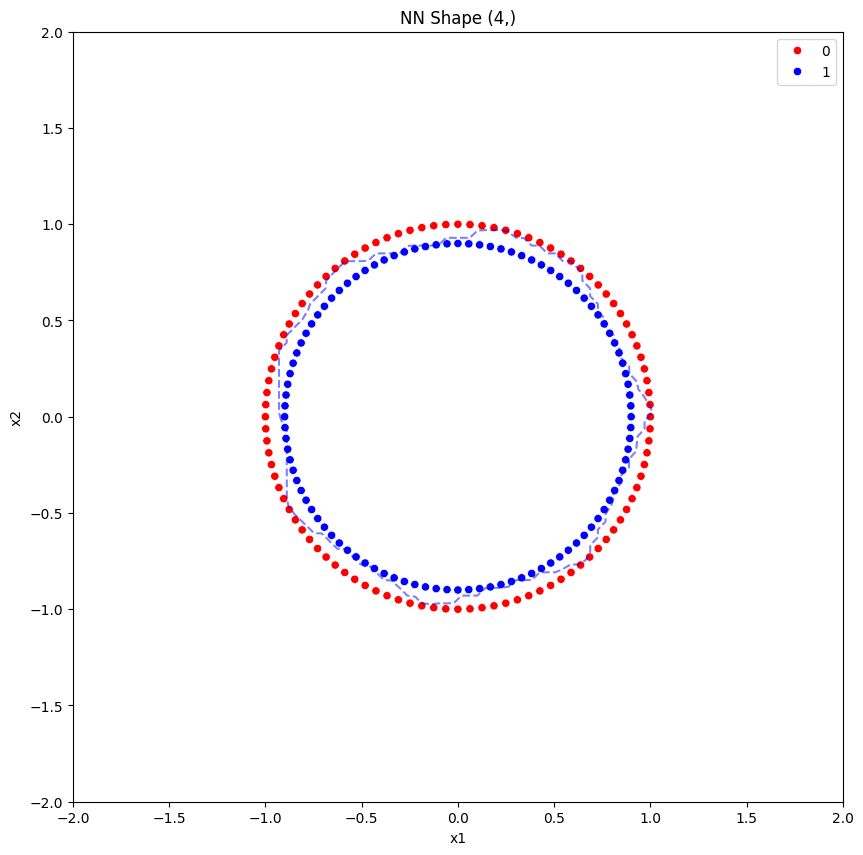

In [29]:
import copy
N_ITER = 100
H_SIZE = 4
network_shape = (H_SIZE,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_09, y_09)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_09, y_09)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_100,X_09,y_09)
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 53.44
Avg Acc after: 0.6322000000000001 Max Acc: 0.94


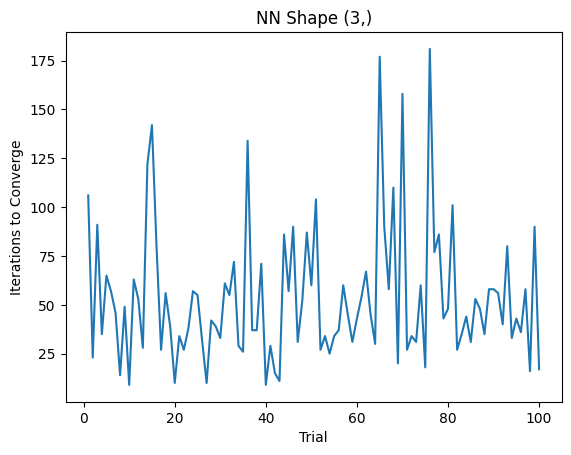

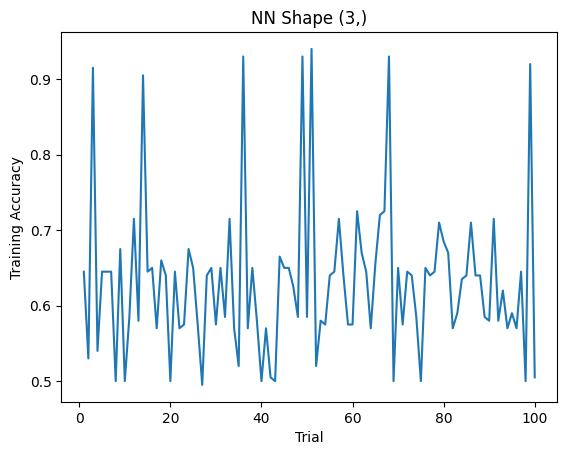

<Figure size 640x480 with 0 Axes>

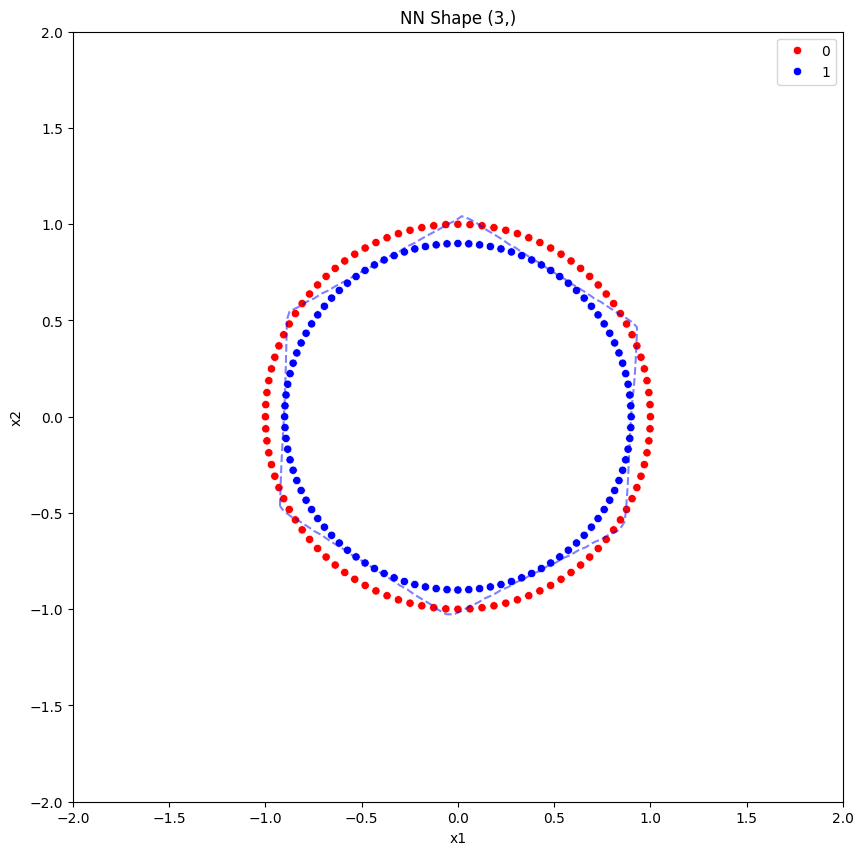

In [30]:
import copy
N_ITER = 100
H_SIZE = 3
network_shape = (H_SIZE,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_09, y_09)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_09, y_09)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_100,X_09,y_09)
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perc

Avg Convergence after: 34.84
Avg Acc after: 0.57225 Max Acc: 0.65


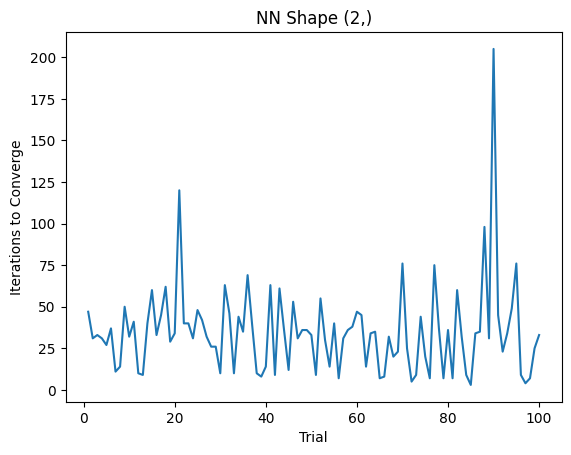

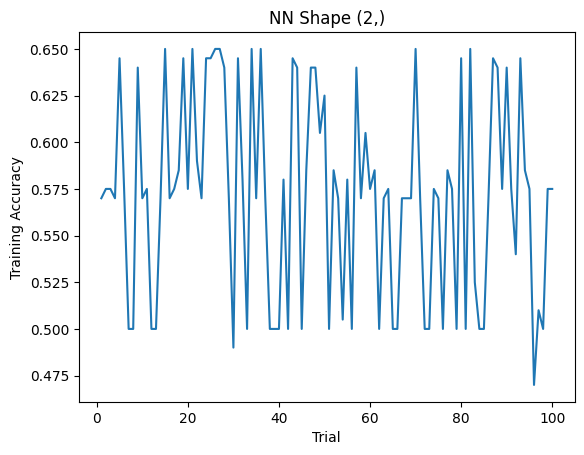

<Figure size 640x480 with 0 Axes>

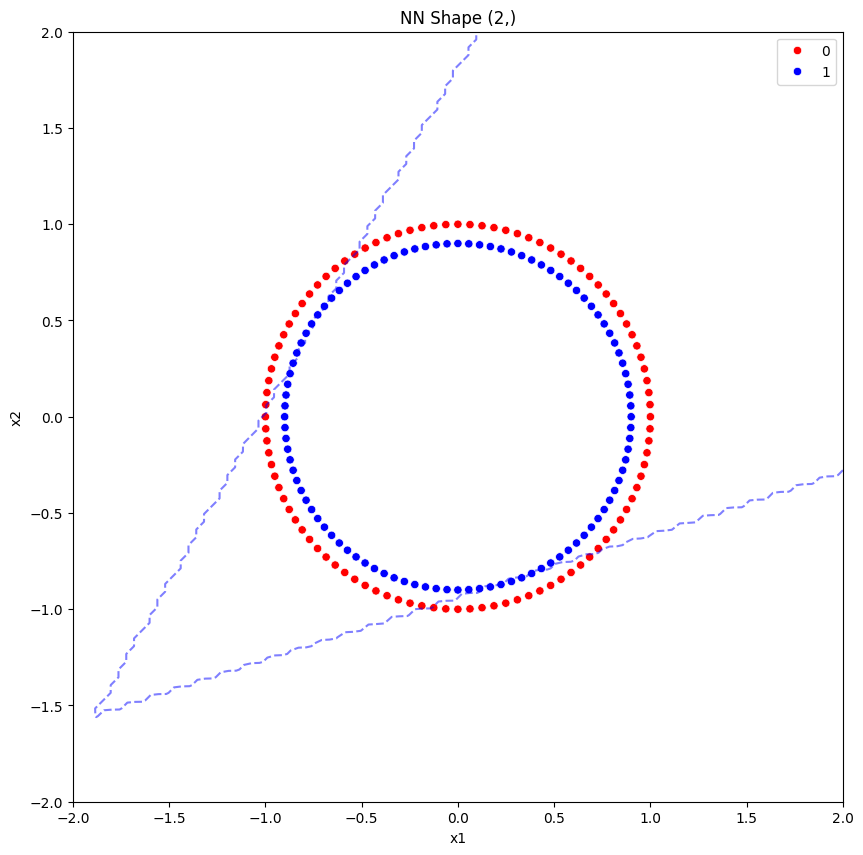

In [31]:
import copy
N_ITER = 100
H_SIZE = 2
network_shape = (H_SIZE,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_09, y_09)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_09, y_09)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_100,X_09,y_09)
plt.title(f"NN Shape ({H_SIZE},)")
plt.savefig(f"figures/cir09_{H_SIZE}_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: 244.93
Avg Acc after: 0.78565 Max Acc: 1.0


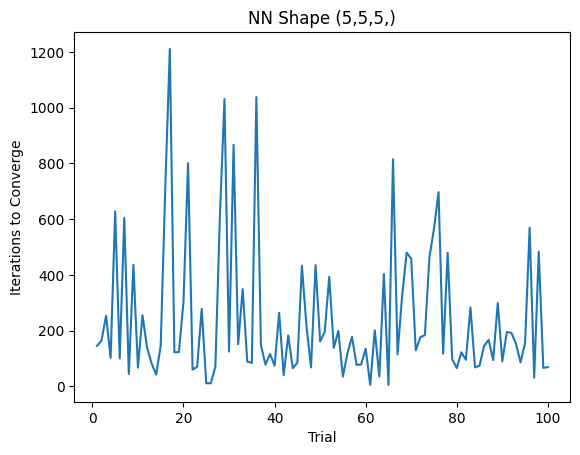

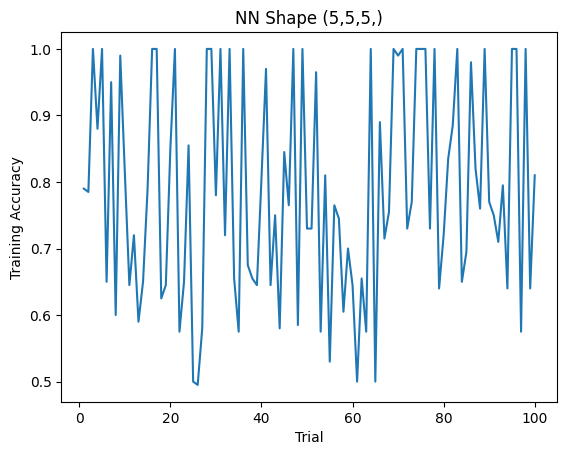

<Figure size 640x480 with 0 Axes>

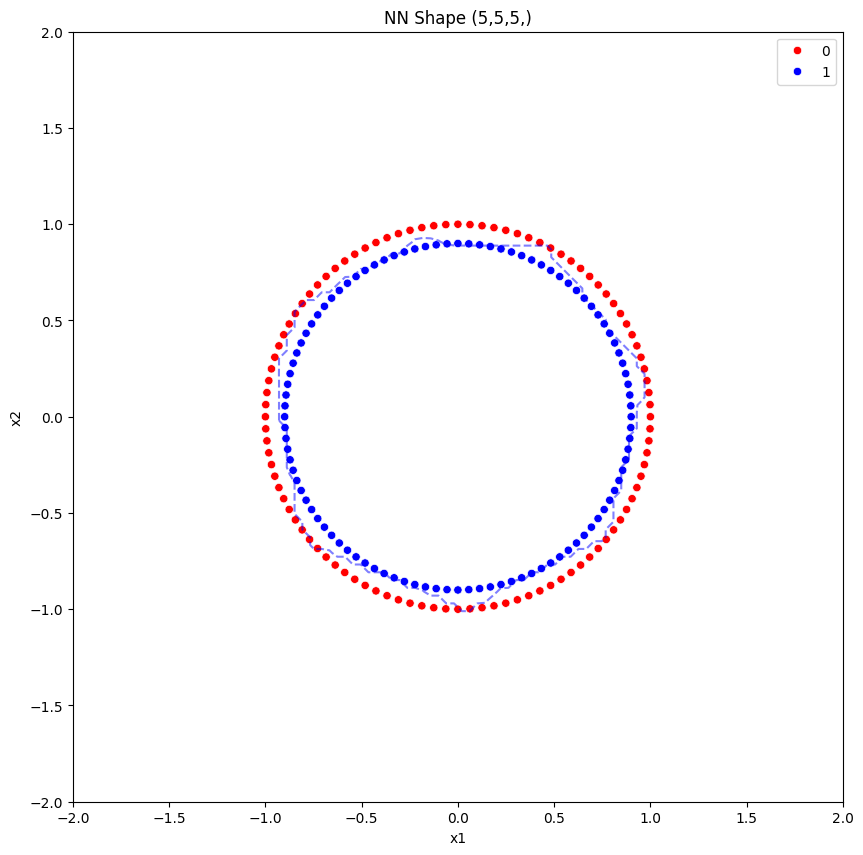

In [32]:
import copy
N_ITER = 100
network_shape = (5,5,5,)
plt_conv = np.zeros((N_ITER))
plt_acc  = np.zeros((N_ITER))
max_acc = 0
for clf_idx in range(N_ITER):
    clf = MLPClassifier( solver='lbfgs', max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
    clf.fit(X_09, y_09)

    plt_conv[clf_idx] = clf.n_iter_
    plt_acc[ clf_idx] = clf.score(X_09, y_09)
    if( plt_acc[ clf_idx] > max_acc ):
        clf_CIR_555_100 = copy.deepcopy( clf )
        max_acc = plt_acc[clf_idx]

print(f"Avg Convergence after: {np.mean(plt_conv)}")
print(f"Avg Acc after: {np.mean(plt_acc)} Max Acc: {np.max(plt_acc)}")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv )
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/cir09_555_conv.jpg")
plt.figure()
plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc )
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/cir09_555_acc.jpg")
plt.figure()
plot_classifier(clf_CIR_555_100,X_09,y_09)
plt.title('NN Shape (5,5,5,)')
plt.savefig("figures/cir09_555_clf.jpg")


/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Avg Convergence after: [ 318.34 2290.88 2086.74]
Avg Acc after: [0.8091 0.9784 0.9555]


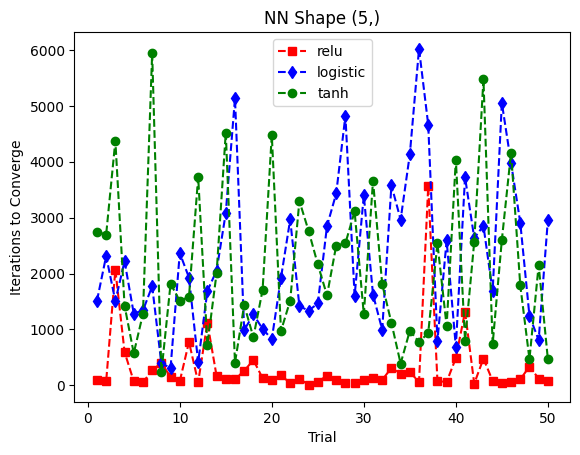

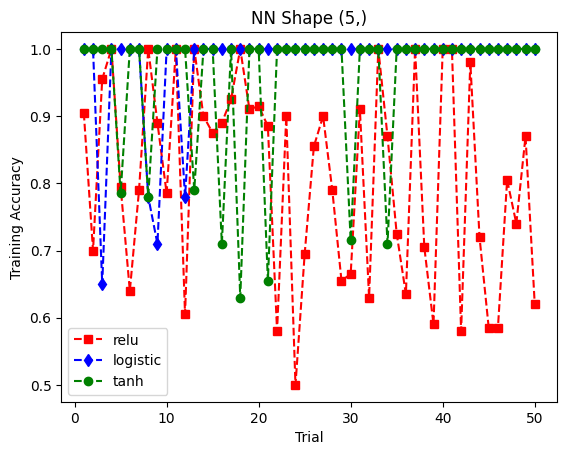

In [33]:
import copy
N_ITER = 50
ACTIVATIONS = ['relu', 'logistic', 'tanh' ]
ACTIVATIONS_LINESPEC = ['rs--', 'bd--', 'go--' ]
N_ACTIVATIONS = len(ACTIVATIONS)
network_shape = (5,)
plt_conv = np.zeros((N_ACTIVATIONS, N_ITER))
plt_acc  = np.zeros((N_ACTIVATIONS, N_ITER))
for activation_idx, activation in enumerate( ACTIVATIONS ):
    for clf_idx in range(N_ITER):
        clf = MLPClassifier( solver='lbfgs', activation=activation, max_iter=20000, tol=10**(-16), hidden_layer_sizes=(network_shape))
        clf.fit(X_09, y_09)
    
        plt_conv[activation_idx][clf_idx] = clf.n_iter_
        plt_acc[ activation_idx][clf_idx] = clf.score(X_09, y_09)
    

print(f"Avg Convergence after: {np.mean(plt_conv, axis=1)}")
print(f"Avg Acc after: {np.mean(plt_acc,axis=1)}")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_conv[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Iterations to Converge')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir09_5_activation_conv.jpg")

plt.figure()
for activation_idx, activation in enumerate( ACTIVATIONS ):
    plt.plot( np.linspace(1,N_ITER,N_ITER), plt_acc[activation_idx],  ACTIVATIONS_LINESPEC[activation_idx], label = ACTIVATIONS[activation_idx] )
plt.legend()
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Training Accuracy')
plt.title('NN Shape (5,)')
plt.savefig("figures/cir09_5_activation_acc.jpg")